In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import calendar
from datetime import datetime
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline



In [4]:
df = pd.read_csv(r"C:\Users\sm196\Desktop\drugsComTrain_raw\drugsComTrain_raw.csv")

In [5]:

df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [6]:
def top3byMonth(month, year):
    month = str(month) if (month > 9) else '0'+str(month)
    year = str(year)
    sales = df.loc[df['datum'].str.contains('^'+year+'\-'+month+'', flags=re.I, regex=True)]
    # reset index
    sales = sales.reset_index()
    # filter relevant columns
    topSales = sales[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
    # sort values horizontally
    topSales = topSales.sort_values(by=0, ascending=False, axis=1)
    # print results
    print('Top 3 drugs by sale in '+calendar.month_name[int(month)]+' '+year)
    for field in topSales.columns.values[0:3]:
        print(' - Product: ' + str(field) + ', Volume sold: ' + str(round(topSales[field].iloc[0], 2)))
    print("\n")

In [7]:
# top3 drugs by sale in January 2015
top3byMonth(1, 2015)

# top3 drugs by sale in July 2016
top3byMonth(7, 2016)

# top3 drugs by sale in September 2017
top3byMonth(9, 2017)

Top 3 drugs by sale in January 2015
 - Product: N02BE, Volume sold: 1044.24
 - Product: N05B, Volume sold: 463.0
 - Product: R03, Volume sold: 177.25


Top 3 drugs by sale in July 2016
 - Product: N02BE, Volume sold: 652.36
 - Product: N05B, Volume sold: 240.0
 - Product: M01AB, Volume sold: 203.97


Top 3 drugs by sale in September 2017
 - Product: N02BE, Volume sold: 863.75
 - Product: N05B, Volume sold: 223.0
 - Product: R03, Volume sold: 139.0




Defining the scattering function that will display scattered sales data on the chart

In [8]:
def scatterData(X_train, y_train, X_test, y_test, title):
    plt.title('Prediction using ' + title)
    plt.xlabel('Month sequence', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

    # Use Matplotlib Scatter Plot
    plt.scatter(X_train, y_train, color='blue', label='Training observation points')
    plt.scatter(X_test, y_test, color='cyan', label='Testing observation points')

In [9]:
def predictLinearRegression(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Linear Regression')

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    plt.plot(X_train, reg.predict(X_train), color='red', label='Linear regressor')
    plt.legend()
    plt.show()

    # LINEAR REGRESSION - Predict/Test model
    y_predict_linear = reg.predict(X_test)

    # LINEAR REGRESSION - Predict for January 2020
    linear_predict = reg.predict([[predictFor]])
    # linear_predict = reg.predict([[predictFor]])[0]

    # LINEAR REGRESSION - Accuracy
    accuracy = reg.score(X_train, y_train)

    # LINEAR REGRESSION - Error
    # error = round(np.mean((y_predict_linear-y_test)**2), 2)
    
    # Results
    print('Linear Regression: ' + str(linear_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')

    return {'regressor':reg, 'values':linear_predict}

In [20]:
product = 'N02BA'


In [21]:
regResults = pd.DataFrame(columns=('Linear', 'Polynomial', 'SVR', 'Voting Regressor'), index=[product])

In [22]:
rcParams['figure.figsize'] = 12, 8

In [23]:

df = pd.read_csv(r"C:\Users\sm196\Desktop\drugsComTrain_raw\drugsComTrain_raw.csv")

In [24]:
df = df.loc[df['datum'].str.contains("2014") | df['datum'].str.contains("2015") | df['datum'].str.contains("2016") | df['datum'].str.contains("2017") | df['datum'].str.contains("2018") | df['datum'].str.contains("2019")]
df = df.reset_index()

In [25]:
df


,index,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...,...
65,65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [26]:
df['datumNumber'] = 1
for index, row in df.iterrows():
    df.loc[index, 'datumNumber'] = index+1

In [27]:
# the first and the last available month is quite low which may indicate that it might be incomplete
# and skewing results so we're dropping it
df.drop(df.head(1).index,inplace=True)
df.drop(df.tail(1).index,inplace=True)

In [28]:

df = df[df[product] != 0]

In [29]:
df.head()

,index,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,datumNumber
1,1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,2
2,2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,3
3,3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,4
4,4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,5
5,5,2014-06-30,112.07,94.710,122.900,548.225,323.0,23.0,57.0,109.3,6


In [30]:
predictFor = len(df)+5
print('Predictions for the product ' + str(product) + ' sales in January 2020')

Predictions for the product N02BA sales in January 2020


In [31]:
regValues = {}

In [37]:
dfSplit = df[['datumNumber', product]]


train,test = train_test_split(dfSplit, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product].values

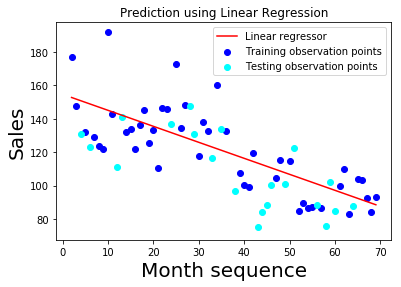

Linear Regression: [[85.71503055]] (Accuracy: 58%)


In [38]:
# LINEAR REGRESSION
linearResult = predictLinearRegression(X_train, y_train, X_test, y_test)
reg = linearResult['regressor']
regValues['Linear'] = round(linearResult['values'][0][0])